# **Start Import**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


ModuleNotFoundError: No module named 'matplotlib'

# **Data Load**




In [ ]:

file_id = '1njpF-ApBF4mEnbbCNmLywxiEkv5gdFV_'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
try:
  df = pd.read_csv(download_url)
except:
  print("Error For Fetching")

In [ ]:
#checking head
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


# **Data Cleaning**

In [ ]:
#checking coloumn
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Sex,0
Age,78
Weight (kg),81
Height (m),67
BMI,64
Abdominal Circumference (cm),67
Blood Pressure (mmHg),0
Total Cholesterol (mg/dL),73
HDL (mg/dL),80
Fasting Blood Sugar (mg/dL),67


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1451.0,47.025500,12.421063,25.000,37.000,46.0000,55.00000,79.000
Weight (kg),1448.0,85.917427,21.012580,50.100,67.050,86.6145,105.00000,120.000
Height (m),1462.0,1.754111,0.113090,1.502,1.660,1.7550,1.84550,2.000
BMI,1465.0,28.465997,7.038685,15.000,22.629,28.1590,34.00000,46.200
Abdominal Circumference (cm),1462.0,91.773214,12.823573,70.000,80.500,91.6000,102.26900,119.996
Total Cholesterol (mg/dL),1456.0,198.539148,57.794099,100.000,150.000,197.0000,249.00000,300.000
HDL (mg/dL),1449.0,56.197378,16.066754,30.000,42.000,56.0000,70.00000,89.000
Fasting Blood Sugar (mg/dL),1462.0,117.485636,30.289174,70.000,92.000,115.0000,138.00000,198.000
Height (cm),1455.0,175.390600,11.251527,150.000,166.000,175.6940,184.20850,199.960
Waist-to-Height Ratio,1450.0,0.525727,0.081213,0.360,0.460,0.5220,0.58375,0.787


In [ ]:
df.dropna(subset=['Weight (kg)', 'Height (m)', 'Age'], inplace=True) #inplace meanse original df will edit
df.isnull().sum()

,0
Sex,0
Age,0
Weight (kg),0
Height (m),0
BMI,57
Abdominal Circumference (cm),58
Blood Pressure (mmHg),0
Total Cholesterol (mg/dL),62
HDL (mg/dL),70
Fasting Blood Sugar (mg/dL),56


In [ ]:
df.loc[: , ['Weight (kg)', 'Height (m)', 'BMI']].head()

,Weight (kg),Height (m),BMI
0,69.1,1.71,23.6
1,118.7,1.69,41.6
3,108.3,1.80,33.4
4,99.5,1.86,28.8
5,117.9,1.87,33.7


In [ ]:
# recalculate the bmi by
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
df.isnull().sum()

,0
Sex,0
Age,0
Weight (kg),0
Height (m),0
BMI,0
Abdominal Circumference (cm),58
Blood Pressure (mmHg),0
Total Cholesterol (mg/dL),62
HDL (mg/dL),70
Fasting Blood Sugar (mg/dL),56


In [ ]:
# Convert height (m) to height (cm)
df['Height (cm)'] = df['Height (m)'] * 100
df.isnull().sum()

,0
Sex,0
Age,0
Weight (kg),0
Height (m),0
BMI,0
Abdominal Circumference (cm),58
Blood Pressure (mmHg),0
Total Cholesterol (mg/dL),62
HDL (mg/dL),70
Fasting Blood Sugar (mg/dL),56


In [ ]:
# Now drop all other null values
df.dropna(inplace=True)
df.isnull().sum()

,0
Sex,0
Age,0
Weight (kg),0
Height (m),0
BMI,0
Abdominal Circumference (cm),0
Blood Pressure (mmHg),0
Total Cholesterol (mg/dL),0
HDL (mg/dL),0
Fasting Blood Sugar (mg/dL),0


In [ ]:
# Taking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           834 non-null    object 
 1   Age                           834 non-null    float64
 2   Weight (kg)                   834 non-null    float64
 3   Height (m)                    834 non-null    float64
 4   BMI                           834 non-null    float64
 5   Abdominal Circumference (cm)  834 non-null    float64
 6   Blood Pressure (mmHg)         834 non-null    object 
 7   Total Cholesterol (mg/dL)     834 non-null    float64
 8   HDL (mg/dL)                   834 non-null    float64
 9   Fasting Blood Sugar (mg/dL)   834 non-null    float64
 10  Smoking Status                834 non-null    object 
 11  Diabetes Status               834 non-null    object 
 12  Physical Activity Level       834 non-null    object 
 13  Family Hi

# **Data Type Conversion**

In [ ]:
columns = df.select_dtypes(include='object').columns
print(columns)

Index(['Sex', 'Blood Pressure (mmHg)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Blood Pressure Category'],
      dtype='object')


In [ ]:
# df['Blood Pressure (mmHg)'].unique()
df['Blood Pressure Category'].unique()


array(['Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2',
       'Normal'], dtype=object)

In [ ]:
df['CVD Risk Level'].unique()

array(['INTERMEDIARY', 'HIGH', 'LOW'], dtype=object)

In [ ]:
df['Physical Activity Level'].unique()

array(['Low', 'High', 'Moderate'], dtype=object)

# **Encoding**

In [ ]:
nominal_cols = ['Sex', 'Smoking Status', 'Diabetes Status', 'Family History of CVD']

ordinal_mapping = {
    'Physical Activity Level': ['Low', 'Moderate', 'High'],
    'CVD Risk Level': ['LOW', 'INTERMEDIARY', 'HIGH'],
    'Blood Pressure Category': ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
}

df_encoded = df.copy()

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
encoded_nominal_features = encoder.fit_transform(df_encoded[nominal_cols])

In [ ]:
# Applying One-Hot Encoding to Nominal Variables
encoded_nominal_df = pd.DataFrame(encoded_nominal_features,
                                  columns=encoder.get_feature_names_out(nominal_cols),
                                  index=df_encoded.index)

# Drop original nominal columns and concatenate the new one-hot encoded columns
df_encoded = df_encoded.drop(columns=nominal_cols)
df_encoded = pd.concat([df_encoded, encoded_nominal_df], axis=1)

In [ ]:
# Applying Manual Ordinal Encoding to Ordinal Variables
for col, order in ordinal_mapping.items():
    mapping = {label: i for i, label in enumerate(order)}

    # Apply the mapping to the column in the DataFrame
    df_encoded[col] = df_encoded[col].map(mapping)
    print(f"Encoded '{col}' using mapping: {mapping}")

Encoded 'Physical Activity Level' using mapping: {'Low': 0, 'Moderate': 1, 'High': 2}
Encoded 'CVD Risk Level' using mapping: {'LOW': 0, 'INTERMEDIARY': 1, 'HIGH': 2}
Encoded 'Blood Pressure Category' using mapping: {'Normal': 0, 'Elevated': 1, 'Hypertension Stage 1': 2, 'Hypertension Stage 2': 3}


In [ ]:
df_encoded = df_encoded.drop('Blood Pressure (mmHg)', axis=1)
df_encoded.head()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Physical Activity Level,CVD Risk Level,...,Estimated LDL (mg/dL),CVD Risk Score,Sex_F,Sex_M,Smoking Status_N,Smoking Status_Y,Diabetes Status_N,Diabetes Status_Y,Family History of CVD_N,Family History of CVD_Y
0,32.0,69.1,1.71,23.631203,86.2,248.0,78.0,111.0,0,1,...,140.0,17.93,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,55.0,118.7,1.69,41.560169,82.5,162.0,50.0,135.0,2,2,...,82.0,20.51,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,44.0,108.3,1.80,33.425926,96.6,134.0,46.0,91.0,2,1,...,58.0,16.36,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,32.0,99.5,1.86,28.760550,102.7,146.0,64.0,141.0,2,1,...,52.0,17.88,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,58.0,117.9,1.87,33.715577,81.4,156.0,67.0,82.0,1,2,...,59.0,16.96,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 1528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           834 non-null    float64
 1   Weight (kg)                   834 non-null    float64
 2   Height (m)                    834 non-null    float64
 3   BMI                           834 non-null    float64
 4   Abdominal Circumference (cm)  834 non-null    float64
 5   Total Cholesterol (mg/dL)     834 non-null    float64
 6   HDL (mg/dL)                   834 non-null    float64
 7   Fasting Blood Sugar (mg/dL)   834 non-null    float64
 8   Physical Activity Level       834 non-null    int64  
 9   CVD Risk Level                834 non-null    int64  
 10  Height (cm)                   834 non-null    float64
 11  Waist-to-Height Ratio         834 non-null    float64
 12  Systolic BP                   834 non-null    float64
 13  Diastolic

In [ ]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Physical Activity Level,CVD Risk Level,...,Estimated LDL (mg/dL),CVD Risk Score,Sex_F,Sex_M,Smoking Status_N,Smoking Status_Y,Diabetes Status_N,Diabetes Status_Y,Family History of CVD_N,Family History of CVD_Y
Age,1.000000,0.037551,0.026211,0.026219,0.098824,0.015920,0.055277,0.091786,-0.017103,0.028760,...,0.000713,0.046197,0.040624,-0.040624,0.038730,-0.038730,0.052557,-0.052557,0.005515,-0.005515
Weight (kg),0.037551,1.000000,0.019354,0.874960,0.037929,-0.007220,-0.005570,0.089470,0.019309,0.117169,...,-0.005567,0.392357,-0.006917,0.006917,0.005622,-0.005622,-0.027724,0.027724,0.006191,-0.006191
Height (m),0.026211,0.019354,1.000000,-0.451034,-0.023451,0.013796,0.024727,0.022198,0.030758,-0.022660,...,0.006850,-0.076398,-0.034686,0.034686,-0.018020,0.018020,-0.020224,0.020224,-0.018433,0.018433
BMI,0.026219,0.874960,-0.451034,1.000000,0.049650,-0.012804,-0.014971,0.078033,-0.005285,0.107458,...,-0.008503,0.390146,0.004120,-0.004120,0.018536,-0.018536,-0.018640,0.018640,0.010926,-0.010926
Abdominal Circumference (cm),0.098824,0.037929,-0.023451,0.049650,1.000000,0.056017,0.005891,0.019594,0.010350,-0.009086,...,0.053230,0.103401,-0.006106,0.006106,0.044804,-0.044804,-0.017444,0.017444,0.048870,-0.048870
Total Cholesterol (mg/dL),0.015920,-0.007220,0.013796,-0.012804,0.056017,1.000000,0.056687,-0.001928,-0.068247,0.133400,...,0.963283,0.512114,0.026552,-0.026552,-0.015395,0.015395,-0.055155,0.055155,0.022946,-0.022946
HDL (mg/dL),0.055277,-0.005570,0.024727,-0.014971,0.005891,0.056687,1.000000,0.073977,-0.044686,-0.186621,...,-0.213452,0.030588,0.026081,-0.026081,0.061105,-0.061105,0.023954,-0.023954,0.015659,-0.015659
Fasting Blood Sugar (mg/dL),0.091786,0.089470,0.022198,0.078033,0.019594,-0.001928,0.073977,1.000000,0.064603,-0.060491,...,-0.021780,0.078053,-0.015998,0.015998,0.007757,-0.007757,-0.032132,0.032132,-0.017864,0.017864
Physical Activity Level,-0.017103,0.019309,0.030758,-0.005285,0.010350,-0.068247,-0.044686,0.064603,1.000000,-0.142392,...,-0.054764,-0.024539,0.024906,-0.024906,0.001420,-0.001420,-0.065874,0.065874,-0.016059,0.016059
CVD Risk Level,0.028760,0.117169,-0.022660,0.107458,-0.009086,0.133400,-0.186621,-0.060491,-0.142392,1.000000,...,0.180722,0.146395,0.026354,-0.026354,-0.177312,0.177312,-0.124695,0.124695,-0.165731,0.165731


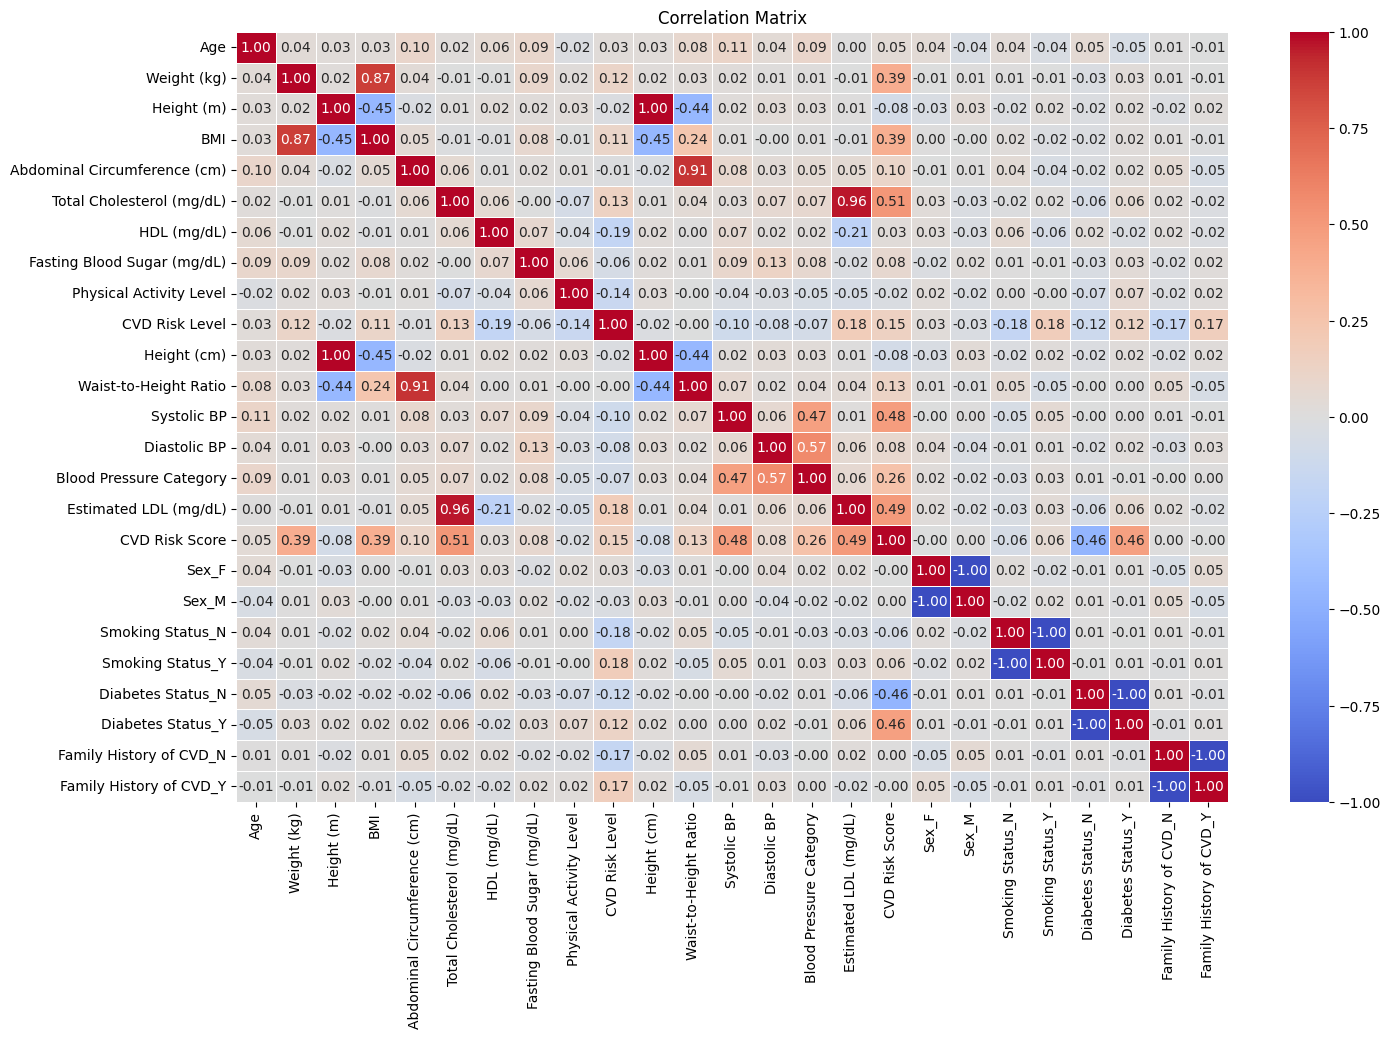

In [ ]:
# Correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score'],
      dtype='object')

# Key Findings:


**Strong Positive Correlations with CVD Risk Score (Medically Consistent):**

  - Lipid Profile: Total Cholesterol (mg/dL) (0.512) and Estimated LDL (mg/dL) (0.493) exhibit strong positive correlations with CVD Risk Score. This aligns with established medical understanding, where higher levels of these cholesterol components are associated with increased cardiovascular risk.

  - Blood Pressure: Systolic BP (0.484) shows a strong positive correlation with CVD Risk Score. Furthermore, Blood Pressure Category (0.258) now demonstrates a positive correlation with CVD Risk Score, indicating that higher blood pressure classifications are correctly associated with increased risk. This represents a successful rectification of previous encoding issues.

  - Diabetes Status: Diabetes Status_Y (0.461) displays a strong positive correlation, confirming that individuals with a positive diabetes status are associated with higher CVD Risk Scores.

  - Anthropometric Measures: Weight (kg) (0.392) and BMI (0.390) show moderate positive correlations, consistent with obesity being a risk factor for CVD.





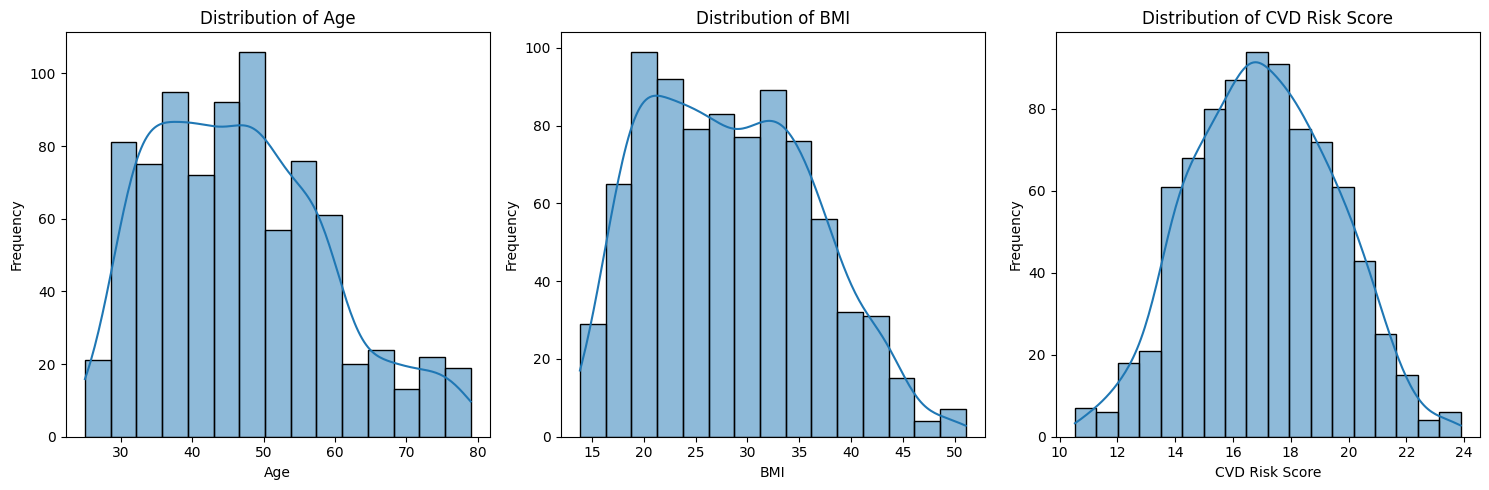

In [ ]:
# Distribution Analysis of Key Numerical Features
features_to_plot = ['Age', 'BMI', 'CVD Risk Score']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_encoded[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()